In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('./exported_goods_values_by_type_of_good.csv')
df

,Chapter,Chapter Description,2011,2012,2013(Jan-Mar)
0,1,Live animals.,3.785294e+07,5.311622e+07,1.026735e+07
1,2,Meat and edible meat offal.,2.502189e+08,1.825310e+08,4.480417e+07
2,3,"Fish and crustaceans, mollusc and other aquati...",2.196573e+10,2.399227e+10,7.180158e+09
3,4,Dairy produce; bird's eggs; natural honey; edi...,2.598661e+08,2.581699e+08,9.023704e+07
4,5,"Products of animal origin, not elsewhere speci...",2.821119e+08,2.149163e+08,4.415270e+07
...,...,...,...,...,...
92,94,"Furniture; bedding, mattresses, mattress suppo...",3.319917e+09,3.380085e+09,8.348234e+08
93,95,"Toys, games and sports requisites; parts and a...",5.507208e+09,6.935119e+09,1.761707e+09
94,96,Miscellaneous manufactured articles,3.994111e+09,3.957857e+09,1.023856e+09
95,97,"Works of art, collectors' pieces and antiques",8.214475e+06,7.302962e+07,3.484290e+05


In [203]:
# Calculate the average value for year
df['avg_2013'] = (df['2013(Jan-Mar)'] * 12) / 3
df

,Chapter,Chapter Description,2011,2012,2013(Jan-Mar),avg_2013
0,1,Live animals.,3.785294e+07,5.311622e+07,1.026735e+07,4.106939e+07
1,2,Meat and edible meat offal.,2.502189e+08,1.825310e+08,4.480417e+07,1.792167e+08
2,3,"Fish and crustaceans, mollusc and other aquati...",2.196573e+10,2.399227e+10,7.180158e+09,2.872063e+10
3,4,Dairy produce; bird's eggs; natural honey; edi...,2.598661e+08,2.581699e+08,9.023704e+07,3.609482e+08
4,5,"Products of animal origin, not elsewhere speci...",2.821119e+08,2.149163e+08,4.415270e+07,1.766108e+08
...,...,...,...,...,...,...
92,94,"Furniture; bedding, mattresses, mattress suppo...",3.319917e+09,3.380085e+09,8.348234e+08,3.339294e+09
93,95,"Toys, games and sports requisites; parts and a...",5.507208e+09,6.935119e+09,1.761707e+09,7.046828e+09
94,96,Miscellaneous manufactured articles,3.994111e+09,3.957857e+09,1.023856e+09,4.095425e+09
95,97,"Works of art, collectors' pieces and antiques",8.214475e+06,7.302962e+07,3.484290e+05,1.393716e+06


In [205]:
# check null values
df.isnull().sum()

Chapter                 0
 Chapter Description    0
2011                    0
2012                    1
2013(Jan-Mar)           4
avg_2013                4
dtype: int64

In [206]:
df.columns.tolist()

['Chapter',
 ' Chapter Description',
 '2011',
 '2012',
 '2013(Jan-Mar)',
 'avg_2013']

In [207]:
# Drop 2013(Jan-Mar) column as here onwards use the average value for 12 months
df.drop(columns='2013(Jan-Mar)', inplace=True)

# Rename the column 'avg_2013' to '2013'
df.rename(columns={'avg_2013': '2013'}, inplace=True)

df.rename(columns={' Chapter Description': 'Description'}, inplace=True)

In [208]:
df

,Chapter,Description,2011,2012,2013
0,1,Live animals.,3.785294e+07,5.311622e+07,4.106939e+07
1,2,Meat and edible meat offal.,2.502189e+08,1.825310e+08,1.792167e+08
2,3,"Fish and crustaceans, mollusc and other aquati...",2.196573e+10,2.399227e+10,2.872063e+10
3,4,Dairy produce; bird's eggs; natural honey; edi...,2.598661e+08,2.581699e+08,3.609482e+08
4,5,"Products of animal origin, not elsewhere speci...",2.821119e+08,2.149163e+08,1.766108e+08
...,...,...,...,...,...
92,94,"Furniture; bedding, mattresses, mattress suppo...",3.319917e+09,3.380085e+09,3.339294e+09
93,95,"Toys, games and sports requisites; parts and a...",5.507208e+09,6.935119e+09,7.046828e+09
94,96,Miscellaneous manufactured articles,3.994111e+09,3.957857e+09,4.095425e+09
95,97,"Works of art, collectors' pieces and antiques",8.214475e+06,7.302962e+07,1.393716e+06


In [209]:
# Calculate the mean of '2011' and '2013' columns
mean_2011_2013 = df[['2011', '2013']].mean(axis=1)

# Fill null values in the '2012' column with the calculated mean
df['2012'].fillna(mean_2011_2013, inplace=True)

In [210]:
# Calculate the mean of '2011' and '2012' columns
mean_2011_2012 = df[['2011', '2012']].mean(axis=1)

# Fill null values in the '2012' column with the calculated mean
df['2013'].fillna(mean_2011_2012, inplace=True)

In [211]:
# checking null values after filling
df.isnull().sum()

Chapter        0
Description    0
2011           0
2012           0
2013           0
dtype: int64

In [212]:
# Summary Statistics
summary_stats = df[['2011', '2012', '2013']].describe()
print(summary_stats)

               2011          2012          2013
count  9.700000e+01  9.700000e+01  9.700000e+01
mean   1.157008e+10  1.518412e+10  1.365565e+10
std    3.827189e+10  5.885351e+10  4.304172e+10
min    3.076000e+03  1.300000e+04  7.656000e+03
25%    2.598661e+08  2.149163e+08  2.166585e+08
50%    1.636592e+09  1.674007e+09  1.712847e+09
75%    4.680619e+09  4.751040e+09  4.892980e+09
max    2.329000e+11  4.697390e+11  2.544486e+11


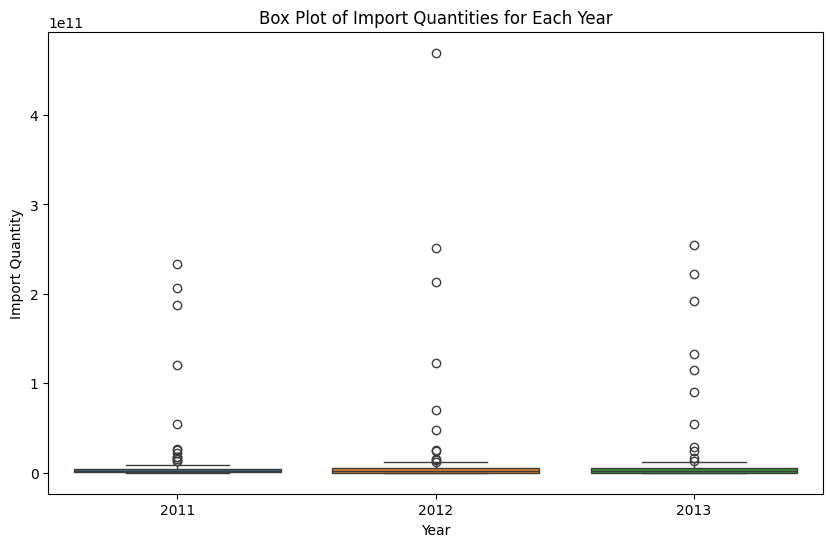

In [213]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['2011', '2012', '2013']])
plt.title('Box Plot of Import Quantities for Each Year')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.show()

C:\Users\Oshadha Senanayake\AppData\Local\Temp\ipykernel_17348\147601174.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


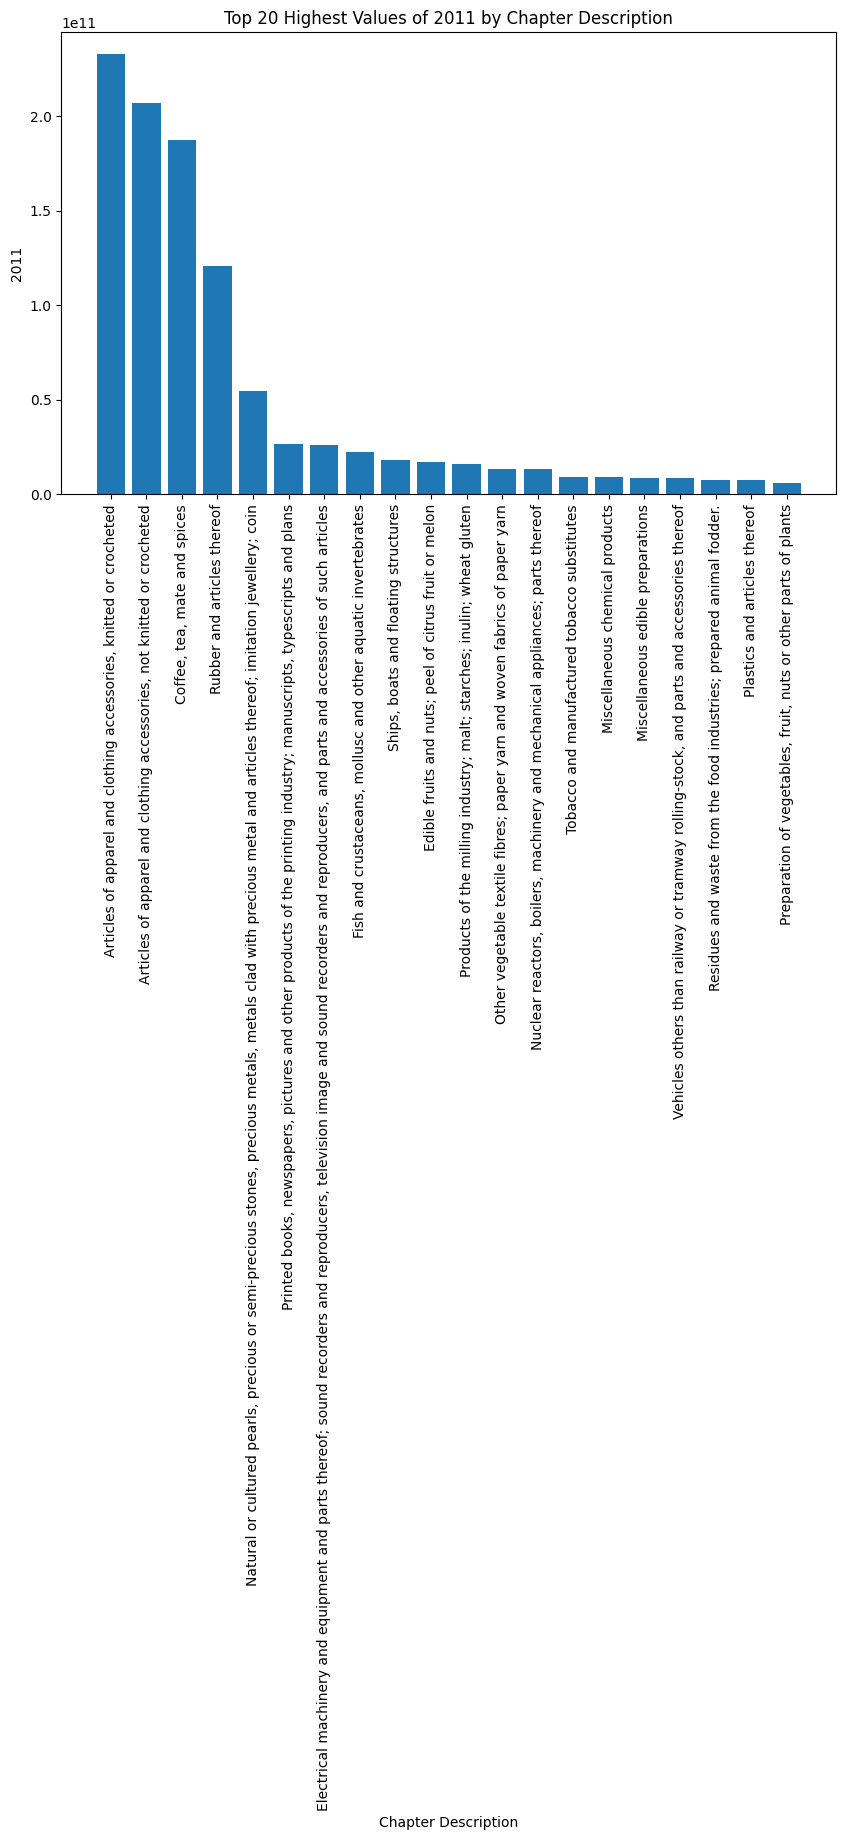

In [214]:
# Twenty largest values in column 2011 
filtered_2011 = df.nlargest(20, ['2011']) 

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_2011['Description'], filtered_2011['2011'])
plt.title('Top 20 Highest Values of 2011 by Chapter Description')
plt.xlabel('Chapter Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

C:\Users\Oshadha Senanayake\AppData\Local\Temp\ipykernel_17348\3635791394.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


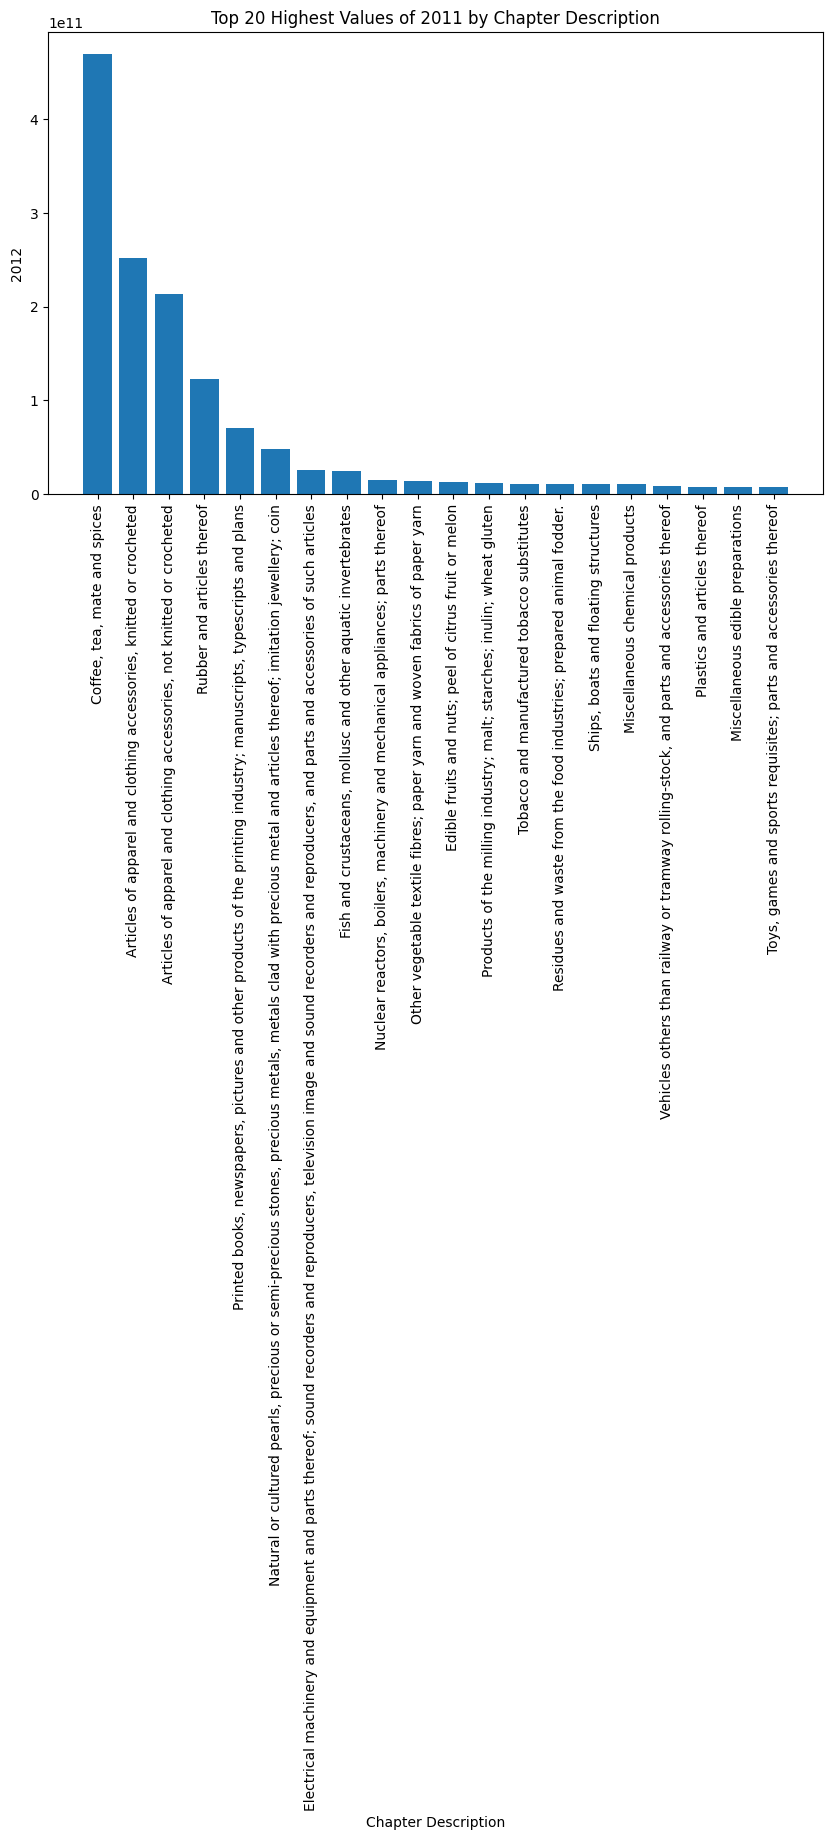

In [215]:
# Twenty largest values in column 2012 
filtered_2012 = df.nlargest(20, ['2012']) 

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_2012['Description'], filtered_2012['2012'])
plt.title('Top 20 Highest Values of 2012 by Chapter Description')
plt.xlabel('Chapter Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [192]:
# Twenty largest values in column 2013 
filtered_2013 = df.nlargest(20, ['2013']) 

# Set display options to show more characters in columns
pd.set_option('display.max_colwidth', None)

# Access the 'Description' column in the DataFrame and display its content
print(filtered_2013['Description'])

# Reset display options to default values
pd.reset_option('display.max_colwidth')


60                                                                                                                         Articles of apparel and clothing accessories, knitted or crocheted
61                                                                                                                     Articles of apparel and clothing accessories, not knitted or crocheted
8                                                                                                                                                                Coffee, tea, mate and spices
39                                                                                                                                                                Rubber and articles thereof
70                             Natural or cultured pearls, precious or semi-precious stones, precious metals, metals clad with precious metal and articles thereof; imitation jewellery; coin
48                                                

C:\Users\Oshadha Senanayake\AppData\Local\Temp\ipykernel_17348\2062002714.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


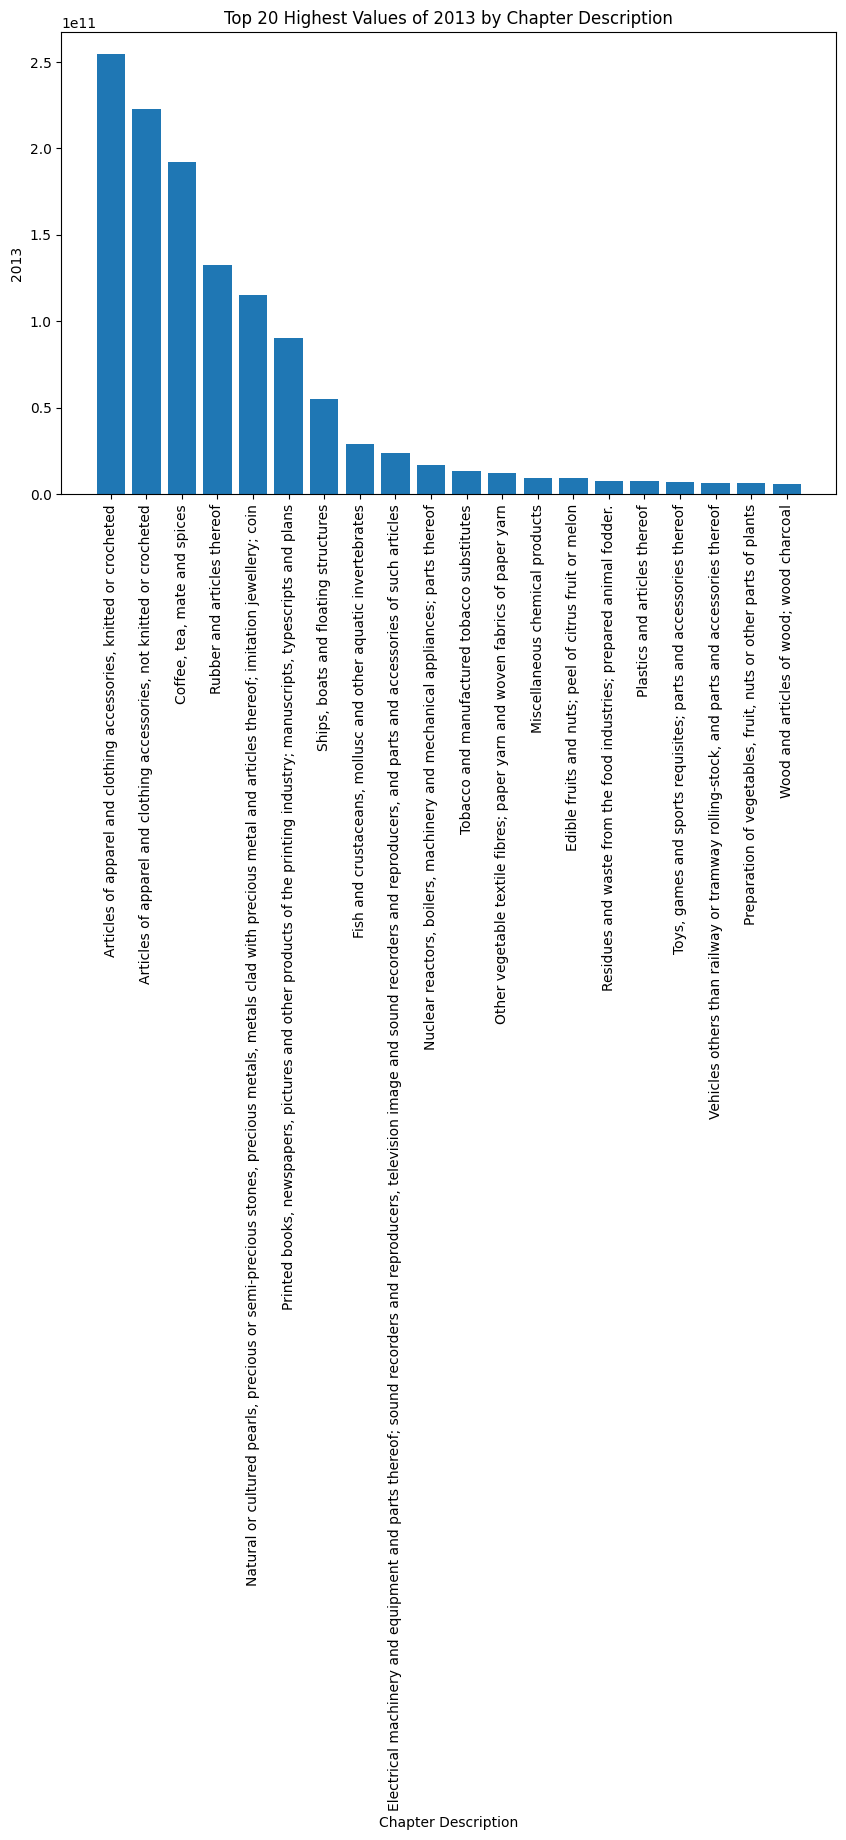

In [216]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_2013['Description'], filtered_2013['2013'])
plt.title('Top 20 Highest Values of 2013 by Chapter Description')
plt.xlabel('Chapter Description')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [217]:
# filter the dataframe to pick top 10 goods in 2013
filtered_largest_10_2013 = df.nlargest(10, ['2013']) 
filtered_largest_10_2013

,Chapter,Description,2011,2012,2013
60,61,"Articles of apparel and clothing accessories, ...",2.329000e+11,2.515430e+11,2.544486e+11
61,62,"Articles of apparel and clothing accessories, ...",2.068700e+11,2.136590e+11,2.225128e+11
8,9,"Coffee, tea, mate and spices",1.875210e+11,4.697390e+11,1.920759e+11
39,40,Rubber and articles thereof,1.207790e+11,1.224960e+11,1.326983e+11
70,71,"Natural or cultured pearls, precious or semi-p...",5.434504e+10,4.791767e+10,1.152276e+11
48,49,"Printed books, newspapers, pictures and other ...",2.619030e+10,7.031657e+10,8.992865e+10
87,89,"Ships, boats and floating structures",1.783124e+10,1.048363e+10,5.502637e+10
2,3,"Fish and crustaceans, mollusc and other aquati...",2.196573e+10,2.399227e+10,2.872063e+10
83,85,Electrical machinery and equipment and parts t...,2.590604e+10,2.584818e+10,2.381463e+10
82,84,"Nuclear reactors, boilers, machinery and mecha...",1.324243e+10,1.481210e+10,1.666996e+10


<Axes: xlabel='Description'>

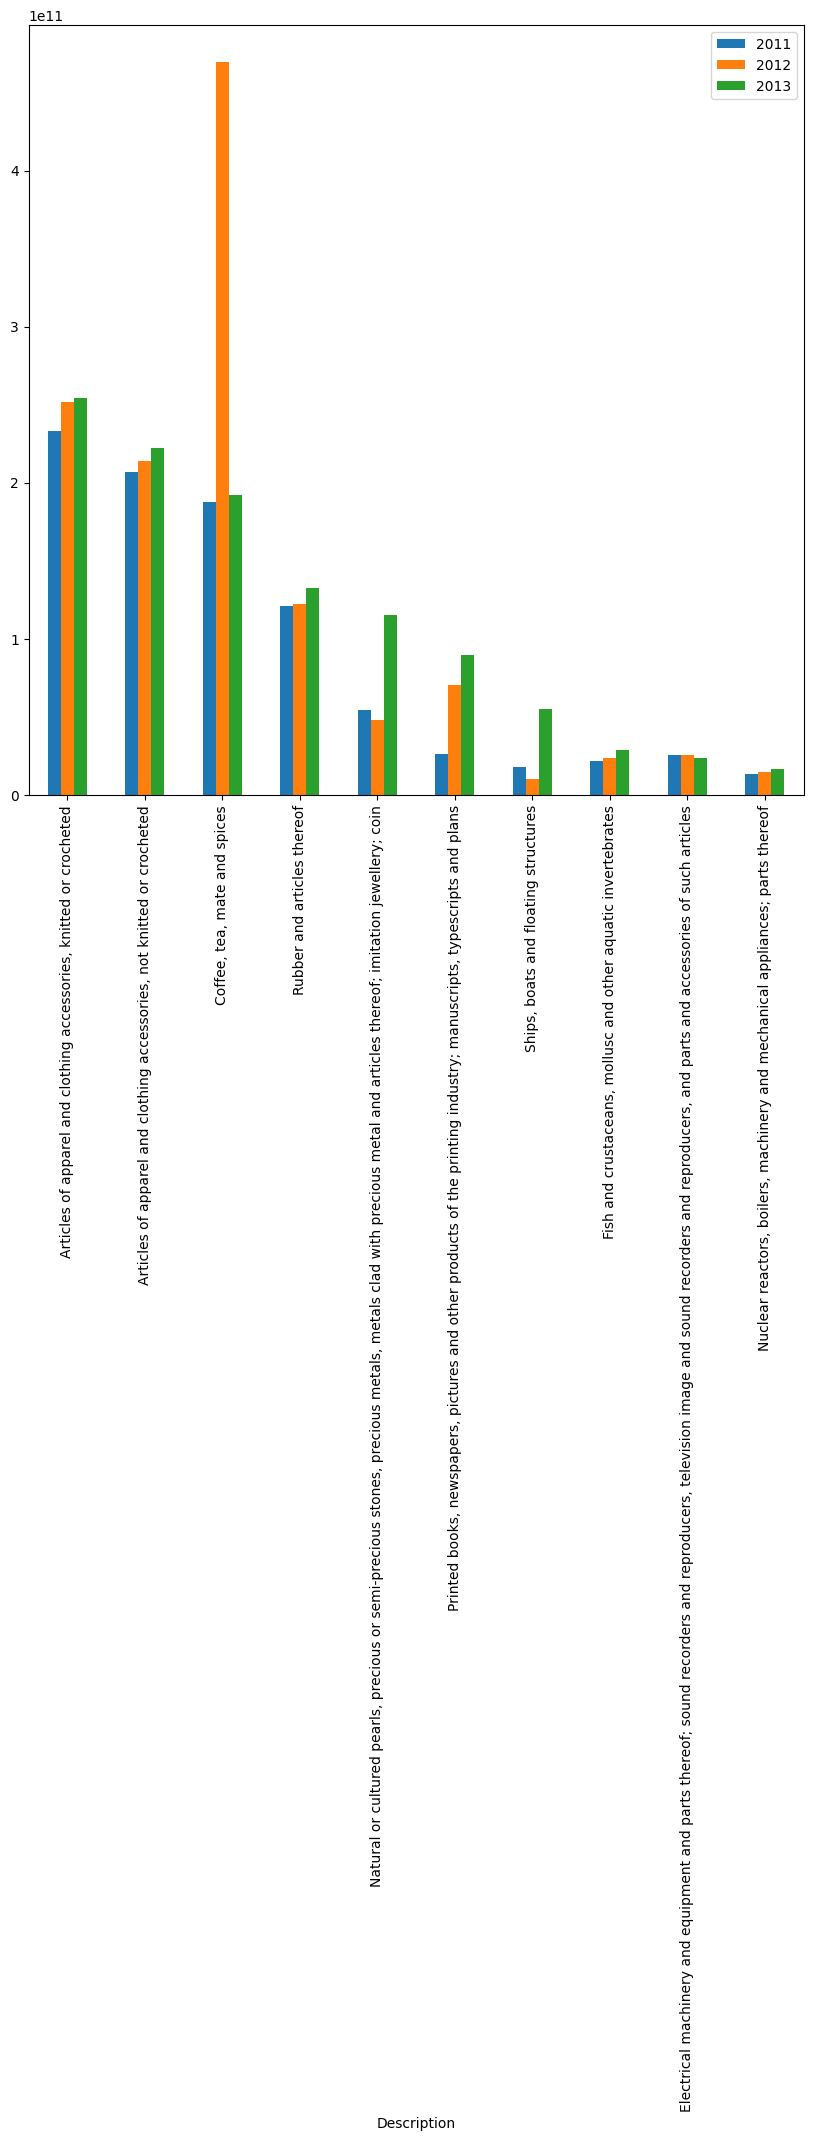

In [218]:
filtered_largest_10_2013.plot.bar(y=['2011', '2012', '2013'], x='Description', figsize=(10, 10))

In [219]:
# Most Imported Chapter
most_imported_2011 = df.loc[df['2011'].idxmax()]['Description']
most_imported_2012 = df.loc[df['2012'].idxmax()]['Description']
most_imported_2013 = df.loc[df['2013'].idxmax()]['Description']
print("Most Imported Chapter in 2011:", most_imported_2011)
print("Most Imported Chapter in 2012:", most_imported_2012)
print("Most Imported Chapter in 2013:", most_imported_2013)

Most Imported Chapter in 2011: Articles of apparel and clothing accessories, knitted or crocheted
Most Imported Chapter in 2012: Coffee, tea, mate and spices
Most Imported Chapter in 2013: Articles of apparel and clothing accessories, knitted or crocheted


<Axes: xlabel='Description'>

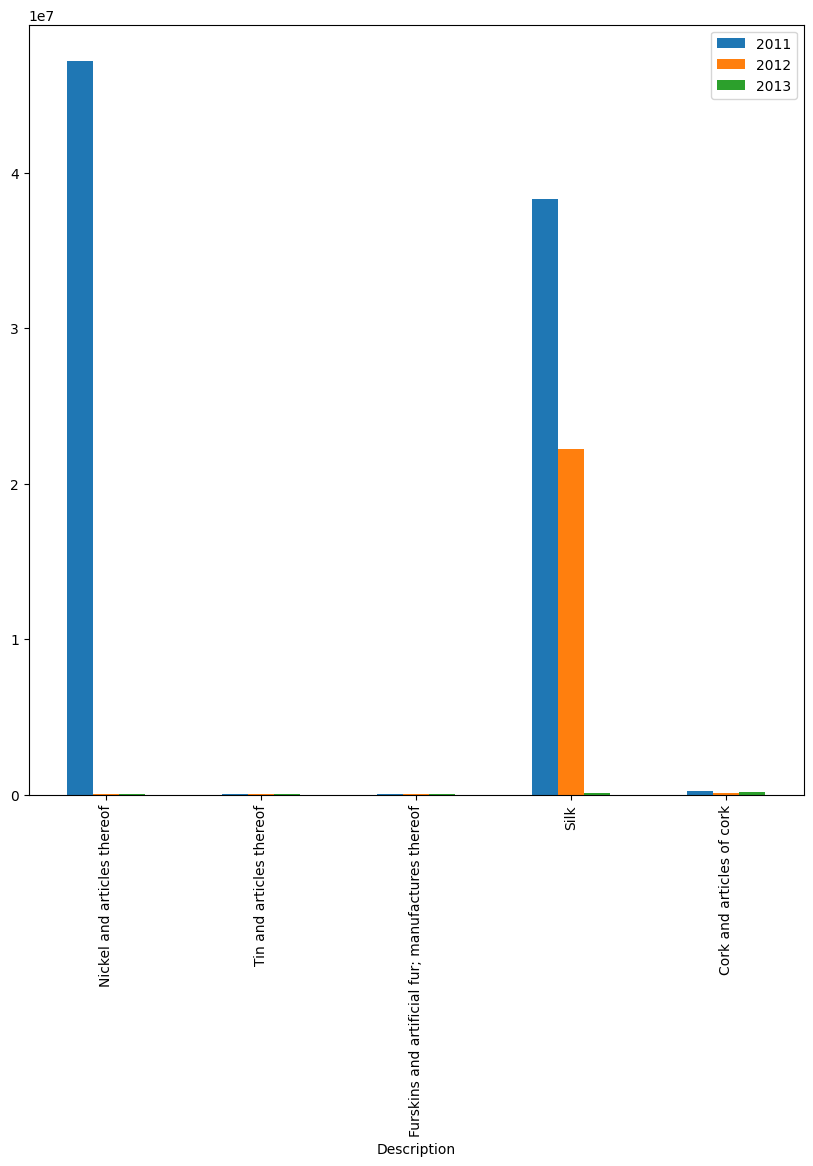

In [220]:
smallest_5_data = df.nsmallest(5, columns='2013')
# Plot the bar chart
smallest_5_data.plot.bar(y=['2011', '2012', '2013'], x='Description', figsize=(10, 10))

In [221]:
# Variance Analysis
variance_per_year = df[['2011', '2012', '2013']].var()
print("\nVariance of Import Quantities for Each Year:")
print(variance_per_year)


Variance of Import Quantities for Each Year:
2011    1.464738e+21
2012    3.463735e+21
2013    1.852589e+21
dtype: float64


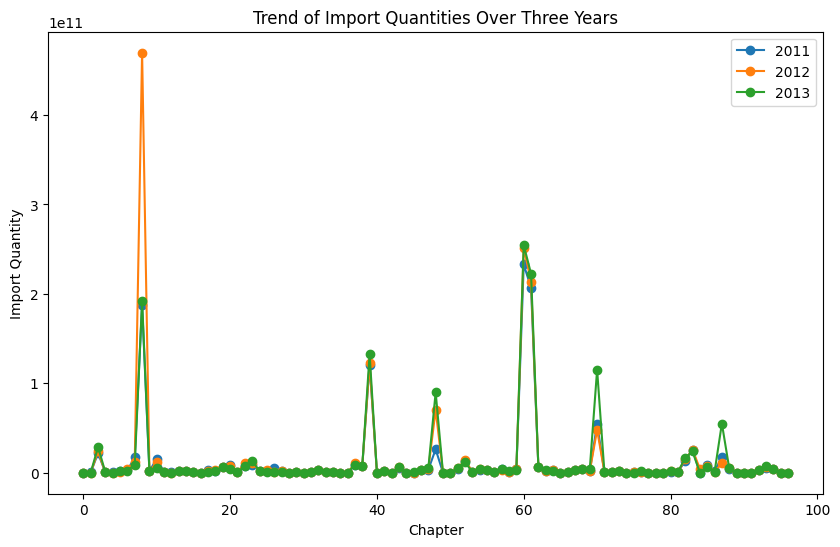

In [222]:
# Trend Analysis (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df[['2011', '2012', '2013']], marker='o')
plt.title('Trend of Import Quantities Over Three Years')
plt.xlabel('Chapter')
plt.ylabel('Import Quantity')
plt.legend(['2011', '2012', '2013'])
plt.show()

In [223]:
df

,Chapter,Description,2011,2012,2013
0,1,Live animals.,3.785294e+07,5.311622e+07,4.106939e+07
1,2,Meat and edible meat offal.,2.502189e+08,1.825310e+08,1.792167e+08
2,3,"Fish and crustaceans, mollusc and other aquati...",2.196573e+10,2.399227e+10,2.872063e+10
3,4,Dairy produce; bird's eggs; natural honey; edi...,2.598661e+08,2.581699e+08,3.609482e+08
4,5,"Products of animal origin, not elsewhere speci...",2.821119e+08,2.149163e+08,1.766108e+08
...,...,...,...,...,...
92,94,"Furniture; bedding, mattresses, mattress suppo...",3.319917e+09,3.380085e+09,3.339294e+09
93,95,"Toys, games and sports requisites; parts and a...",5.507208e+09,6.935119e+09,7.046828e+09
94,96,Miscellaneous manufactured articles,3.994111e+09,3.957857e+09,4.095425e+09
95,97,"Works of art, collectors' pieces and antiques",8.214475e+06,7.302962e+07,1.393716e+06


In [224]:
# Five largest values in 2011 
filtered_df = df.nlargest(5, ['2011']) 
filtered_df

,Chapter,Description,2011,2012,2013
60,61,"Articles of apparel and clothing accessories, ...",2.329000e+11,2.515430e+11,2.544486e+11
61,62,"Articles of apparel and clothing accessories, ...",2.068700e+11,2.136590e+11,2.225128e+11
8,9,"Coffee, tea, mate and spices",1.875210e+11,4.697390e+11,1.920759e+11
39,40,Rubber and articles thereof,1.207790e+11,1.224960e+11,1.326983e+11
70,71,"Natural or cultured pearls, precious or semi-p...",5.434504e+10,4.791767e+10,1.152276e+11


In [225]:
# Pivot the DataFrame
pivot_df = filtered_df.pivot_table(index=None, columns='Chapter', values=['2011', '2012', '2013'])
pivot_df

Chapter,9,40,61,62,71
2011,1.875210e+11,1.207790e+11,2.329000e+11,2.068700e+11,5.434504e+10
2012,4.697390e+11,1.224960e+11,2.515430e+11,2.136590e+11,4.791767e+10
2013,1.920759e+11,1.326983e+11,2.544486e+11,2.225128e+11,1.152276e+11


In [226]:
pivot_df.index.name = 'Year'
pivot_df.index

Index(['2011', '2012', '2013'], dtype='object', name='Year')

In [227]:
pivot_df

Chapter,9,40,61,62,71
Year,,,,,
2011,1.875210e+11,1.207790e+11,2.329000e+11,2.068700e+11,5.434504e+10
2012,4.697390e+11,1.224960e+11,2.515430e+11,2.136590e+11,4.791767e+10
2013,1.920759e+11,1.326983e+11,2.544486e+11,2.225128e+11,1.152276e+11


In [228]:
from prophet import Prophet

In [231]:
df_prophet = pivot_df.reset_index(inplace=False).rename(columns={'Year': 'ds', 61 : 'y'}, inplace=False).loc[:,['ds','y']]
df_prophet

Chapter,ds,y
0,2011,2.329000e+11
1,2012,2.515430e+11
2,2013,2.544486e+11


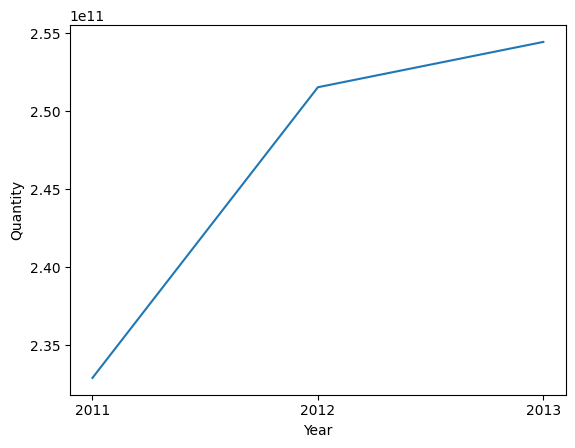

In [233]:
plt.plot(df_prophet['ds'], df_prophet['y'])
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

In [234]:
model = Prophet()
model.fit(df_prophet)

00:31:08 - cmdstanpy - INFO - Chain [1] start processing
00:31:08 - cmdstanpy - INFO - Chain [1] done processing


In [235]:
future = model.make_future_dataframe(periods=3, freq='Y')
future.tail()

,ds
1,2012-01-01
2,2013-01-01
3,2013-12-31
4,2014-12-31
5,2015-12-31


In [236]:
forecast = model.predict(future)

In [237]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]) 

          ds          yhat    yhat_lower    yhat_upper
0 2011-01-01  2.328999e+11  2.328999e+11  2.328999e+11
1 2012-01-01  2.515429e+11  2.515429e+11  2.515429e+11
2 2013-01-01  2.544486e+11  2.544486e+11  2.544486e+11
3 2013-12-31  2.882547e+11  2.882546e+11  2.882547e+11
4 2014-12-31  3.062178e+11  3.062178e+11  3.062178e+11
5 2015-12-31  3.238491e+11  3.238491e+11  3.238491e+11


C:\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


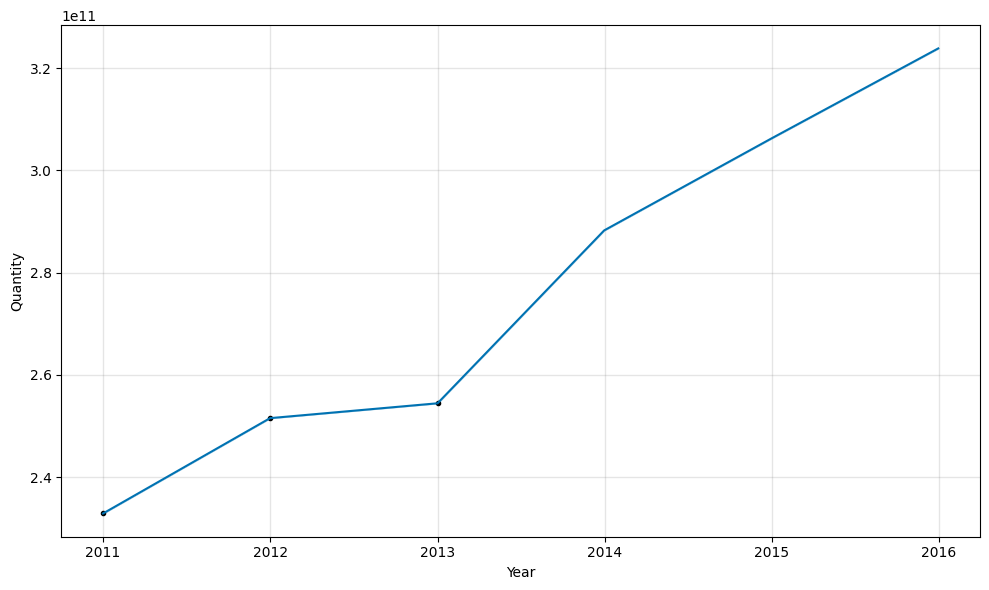

In [238]:
model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()